In [1]:
import torch

from script.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [2]:
sequential = False
epochs = 1
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]
if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

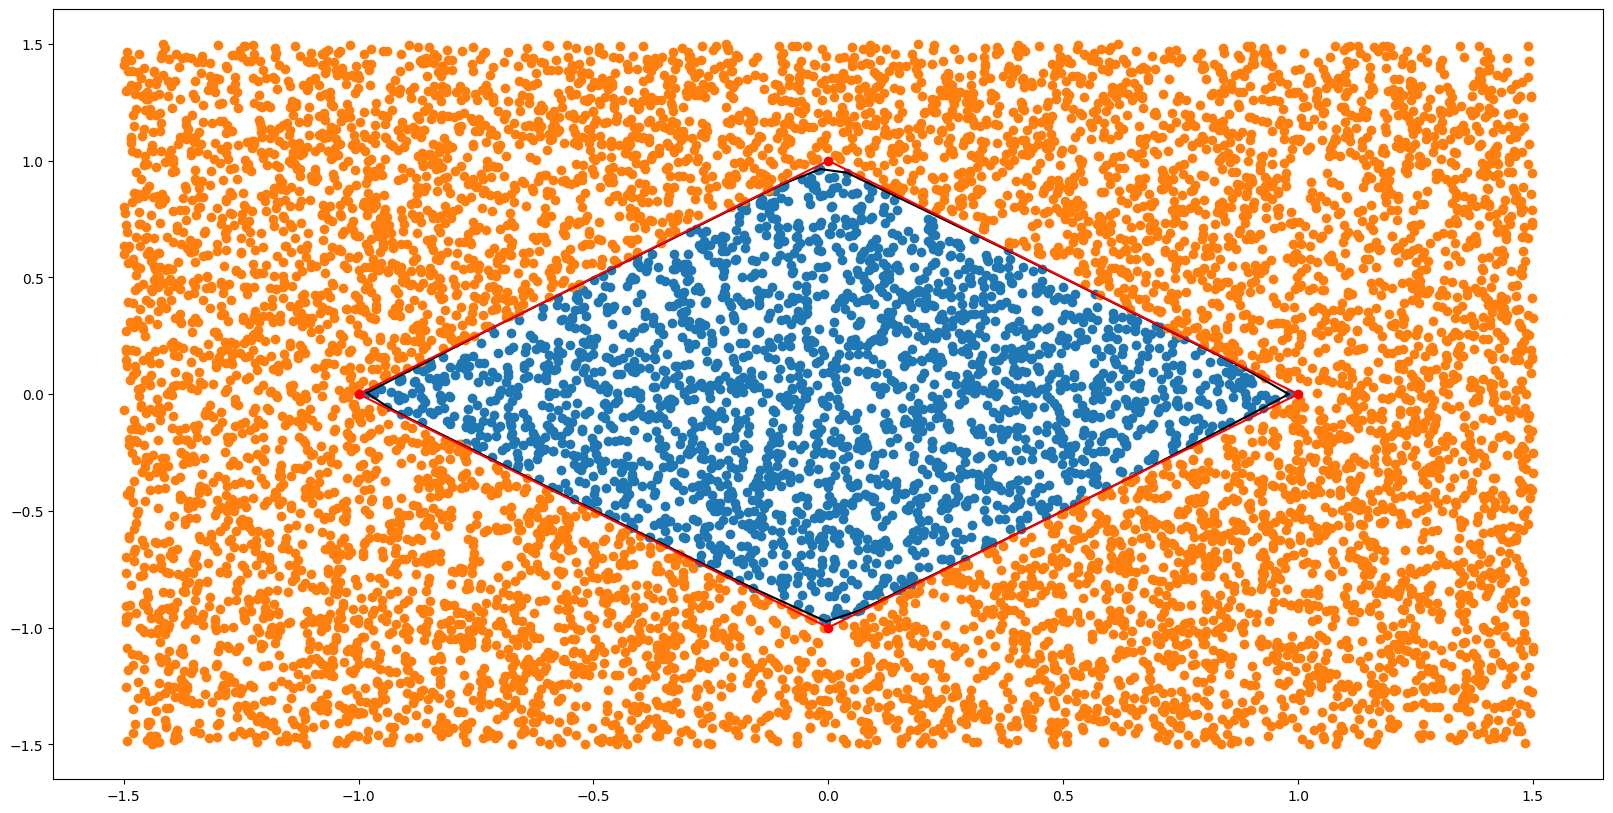

In [4]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range)
plots.plt_initial()


In [5]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential)

=== Epoch: 0===
batch = 0, mean loss = 1.96620704258428
batch = 100, mean loss = 1.387469716054649
batch = 200, mean loss = 1.3681141625582416
batch = 300, mean loss = 1.330629899526564
batch = 400, mean loss = 1.3002064406680756
batch = 500, mean loss = 1.2703865940560493
batch = 600, mean loss = 1.2384324942751184
batch = 700, mean loss = 1.2082891012149581
batch = 800, mean loss = 1.1828445458082544
batch = 900, mean loss = 1.1605217257883347
batch = 1000, mean loss = 1.1363655390001843
batch = 1100, mean loss = 1.114552774706361
batch = 1200, mean loss = 1.0910778741753593
batch = 1300, mean loss = 1.0697935363087185
batch = 1400, mean loss = 1.0536908502364837
batch = 1500, mean loss = 1.0356607133640572
batch = 1600, mean loss = 1.0188085664820805
batch = 1700, mean loss = 1.0015287532053543
batch = 1800, mean loss = 0.983425572039002
batch = 1900, mean loss = 0.9638717830914533
batch = 2000, mean loss = 0.9463489179602065
batch = 2100, mean loss = 0.9302020998282388
batch = 2200

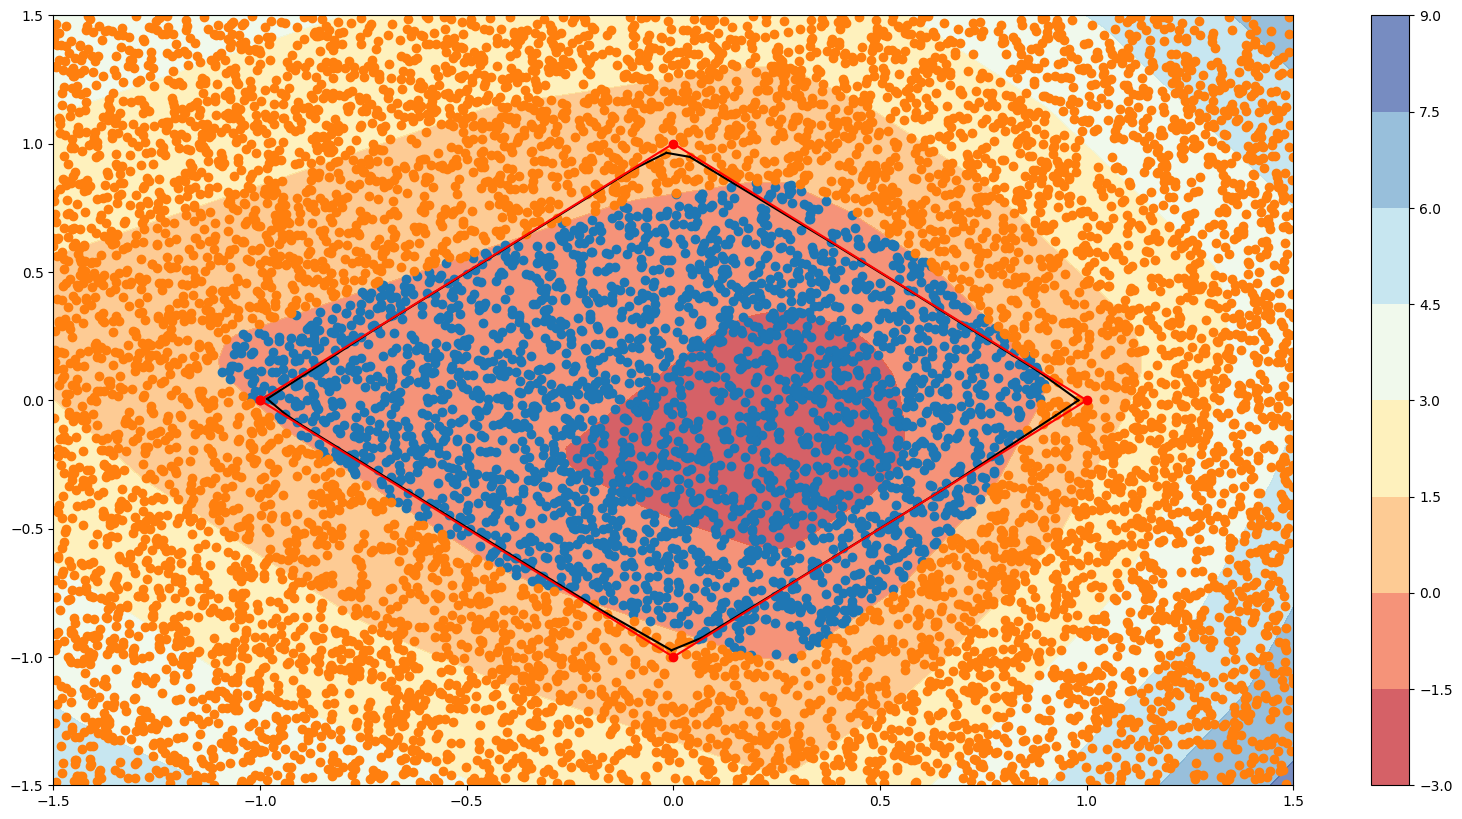

In [6]:
plots.plt_mesh()

In [7]:
result = verification(icnn, sequential)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 390 nonzeros
Model fingerprint: 0x4ca1903d
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [4e-05, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+02]
  RHS range        [9e-02, 1e+02]
Presolve removed 66 rows and 43 columns
Presolve time: 0.00s
Presolved: 72 rows, 53 columns, 281 nonzeros
Variable types: 36 continuous, 17 integer (17 binary)

Root relaxation: objective 7.746811e+00, 39 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

TypeError: '<=' not supported between instances of 'Tensor' and 'NoneType'

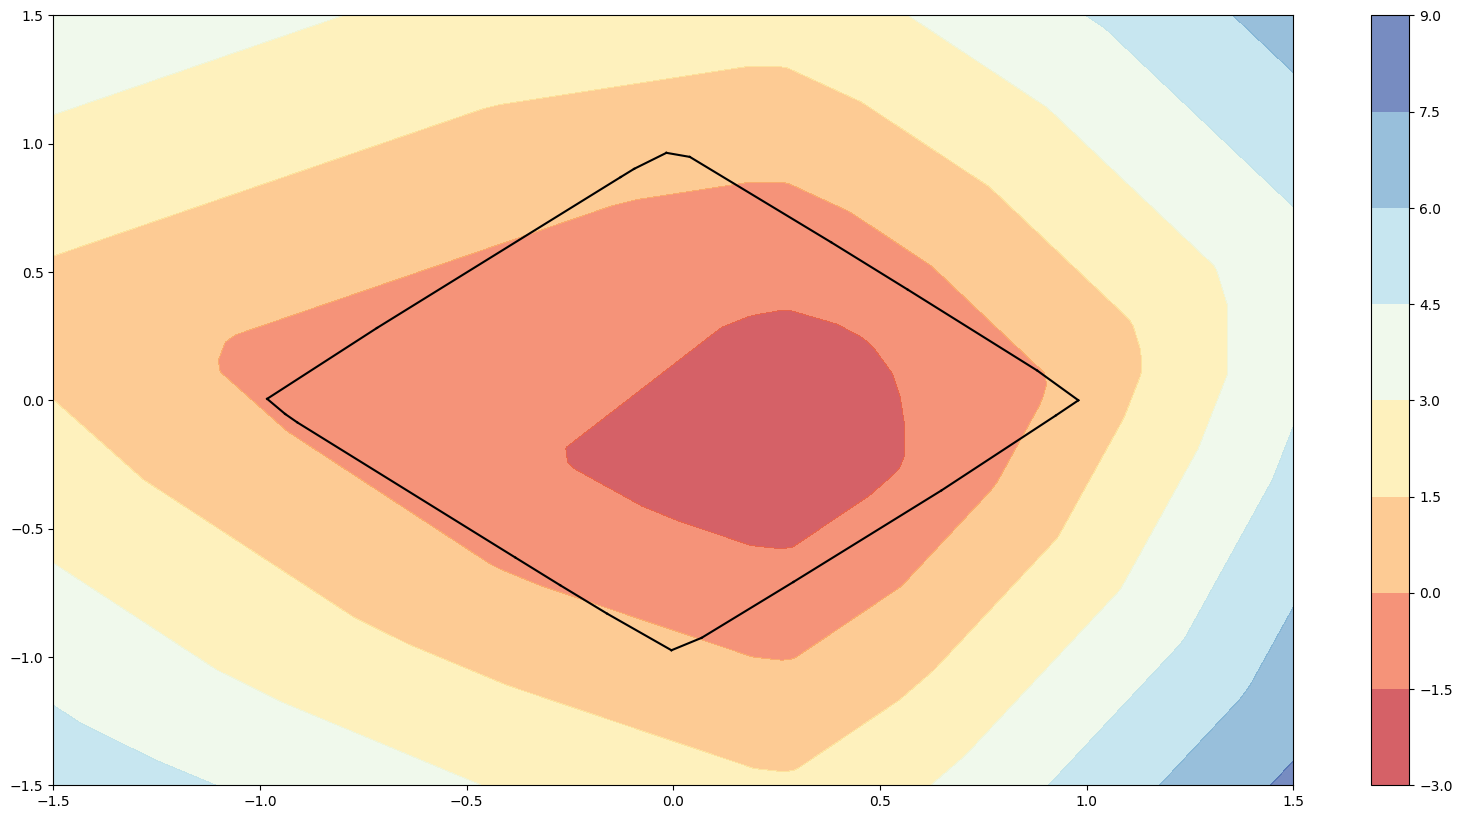

In [8]:
plots.c = result
plots.plt_mesh()
